# Convolutional AutoEncoder

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPooling2D, Flatten, UpSampling2D, Reshape

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [16]:
model = Sequential()

# encoder
model.add(InputLayer(shape= (28, 28, 1)))
model.add(Conv2D(filters= 16, kernel_size= (3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Conv2D(filters= 8, kernel_size= (3, 3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size= (2, 2), padding= 'same'))

model.add(Conv2D(filters= 8, kernel_size= (3, 3), activation= 'relu', padding= 'same', strides= (2, 2)))
model.add(Flatten())

# decoder
model.add(Reshape((4, 4, 8)))
model.add(Conv2D(filters= 8, kernel_size= (3, 3), activation= 'relu', padding= 'same'))
model.add(UpSampling2D(size= (2, 2)))

model.add(Conv2D(filters= 8, kernel_size= (3, 3), activation= 'relu', padding= 'same'))
model.add(UpSampling2D(size= (2, 2)))

model.add(Conv2D(filters= 16, kernel_size= (3, 3), activation= 'relu'))
model.add(UpSampling2D(size= (2, 2)))

model.add(Conv2D(filters= 1, kernel_size= (3, 3), activation= 'sigmoid', padding= 'same'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer= tf.keras.optimizers.Adam(), loss= 'binary_crossentropy', metrics= ['accuracy'])
model.fit(
    x_train,
    x_train,
    epochs= 10,
    batch_size= 256,
    validation_data= (x_test, x_test)
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.8065 - loss: 0.1253 - val_accuracy: 0.8075 - val_loss: 0.1168
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8092 - loss: 0.1161 - val_accuracy: 0.8091 - val_loss: 0.1102
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.8101 - loss: 0.1102 - val_accuracy: 0.8099 - val_loss: 0.1058
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.8103 - loss: 0.1066 - val_accuracy: 0.8104 - val_loss: 0.1031
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8112 - loss: 0.1039 - val_accuracy: 0.8107 - val_loss: 0.1009
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8120 - loss: 0.1016 - val_accuracy: 0.8110 - val_loss: 0.0991
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8120 - loss: 0.0999 - val_accuracy: 0.8115 - val_loss: 0.0976
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8125 - loss: 0.0983 - val_accu

In [19]:
encoder = Model(inputs= model.get_layer('conv2d_10').input,
                outputs= model.get_layer('flatten_2').output)

encoder.summary()

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
encoded_images = encoder.predict(x_test)
decoded_images = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [21]:
encoded_images.shape, decoded_images.shape

((10000, 128), (10000, 28, 28, 1))

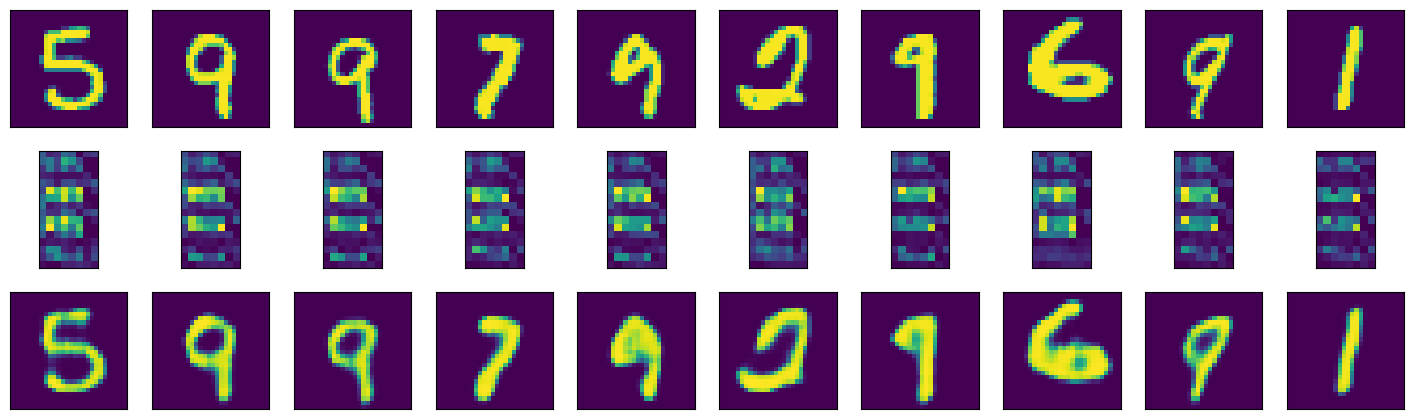

In [22]:
num_images = 10
images_test = np.random.randint(x_test.shape[0], size= num_images)

plt.figure(figsize= (18, 18))
for i, index_image in enumerate(images_test):
    # original image
    axis = plt.subplot(10, 10, i+1)
    plt.imshow(x_test[index_image].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())

    # encoded image
    axis = plt.subplot(10, 10, i+1+num_images)
    plt.imshow(encoded_images[index_image].reshape(16, 8))
    plt.xticks(())
    plt.yticks(())

    # decoded image
    axis = plt.subplot(10, 10, i+1+num_images*2)
    plt.imshow(decoded_images[index_image].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())